In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import lib.dataset as dataset
import lib.network as network
import lib.path as path
import lib.utils as utils
from collections import deque
from tensorflow.python.tools import inspect_checkpoint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
net=network.Network()

learn_rate 0.1, epoch_count 2, batch_size 2
encoder
recurrent_module
decoder
loss
optimizer
misc op
initalize variables


In [16]:
data_all, label_all = dataset.get_preprocessed_dataset()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        data_all, label_all, test_size=0.2)
 
X_train, X_val, y_train, y_val =sklearn.model_selection.train_test_split(
    X_train, y_train, test_size=0.2)

X_train_batchs, y_train_batchs = dataset.get_suffeled_batchs(
    X_train, y_train, net.batch_size)

X_val_batchs, y_val_batchs = dataset.get_suffeled_batchs(
    X_val, y_val, net.batch_size)

In [17]:
checkpoint_path="/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/aws/model_2018-03-13_21:51:42_L:0.001_E:10_B:16/epoch_0"
net.restore(checkpoint_path)

INFO:tensorflow:Restoring parameters from /Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/aws/model_2018-03-13_21:51:42_L:0.001_E:10_B:16/epoch_0/model.ckpt


INFO:tensorflow:Restoring parameters from /Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/aws/model_2018-03-13_21:51:42_L:0.001_E:10_B:16/epoch_0/model.ckpt


NotFoundError: Key step_count_1 not found in checkpoint
	 [[Node: save_1/RestoreV2_181 = RestoreV2[dtypes=[DT_INT32], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_1/Const_0_0, save_1/RestoreV2_181/tensor_names, save_1/RestoreV2_181/shape_and_slices)]]

Caused by op 'save_1/RestoreV2_181', defined at:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-233aa59fa277>", line 1, in <module>
    net=network.Network()
  File "/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/lib/network.py", line 95, in __init__
    self.saver = tf.train.Saver()
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1239, in __init__
    self.build()
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1248, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1284, in _build
    build_save=build_save, build_restore=build_restore)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 765, in _build_internal
    restore_sequentially, reshape)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 428, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 268, in restore_op
    [spec.tensor.dtype])[0])
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1031, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3158, in create_op
    op_def=op_def)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1624, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key step_count_1 not found in checkpoint
	 [[Node: save_1/RestoreV2_181 = RestoreV2[dtypes=[DT_INT32], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_1/Const_0_0, save_1/RestoreV2_181/tensor_names, save_1/RestoreV2_181/shape_and_slices)]]


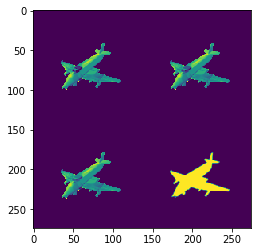

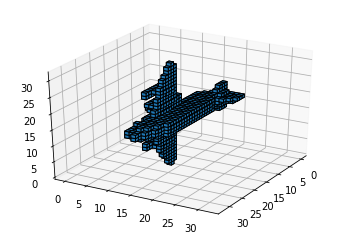

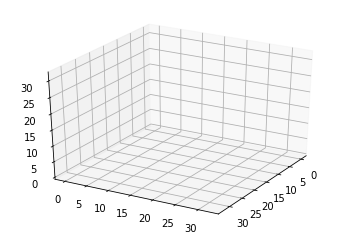

In [10]:
i=0
x=dataset.from_npy(data_all[i])
y=dataset.from_npy(label_all[i])
y_hat=net.predict(x)
utils.vis_multichannel(x[0][1])
utils.vis_voxel(y[0])
utils.vis_voxel(y_hat[0])